# n queens job shop scheduling
Adapted from https://github.com/timnon/pyschedule/blob/master/examples/n-queens-job-shop.py

In [1]:
%matplotlib widget
import processscheduler as ps

In [2]:
# set input size to 5 just for readability, increasing up to 30 is ok
# to get a solution in a reasonable time
n = 20
pb = ps.SchedulingProblem(name="n_queens_type_scheduling", horizon=n)

In [3]:
# resources
R = {i: ps.Worker(name="W-%i" % i) for i in range(n)}

In [4]:
# tasks
T = {
    (i, j): ps.FixedDurationTask(name="T-%i-%i" % (i, j), duration=1)
    for i in range(n)
    for j in range(n)
}

In [5]:
# precedence constrains
for i in range(n):
    for j in range(1, n):
        ps.TaskPrecedence(task_before=T[i, j - 1], task_after=T[i, j], offset=0)

In [6]:
# resource assignment modulo n
for j in range(n):
    for i in range(n):
        T[(i + j) % n, j].add_required_resource(R[i])

In [7]:
# solve
solver = ps.SchedulingSolver(problem=pb, logics="QF_UFIDL")
sol = solver.solve()

Solver type:
===========

-> SMT solver using logics QF_UFIDL

Total computation time:
=====================

n_queens_type_scheduling satisfiability checked in 0.21s

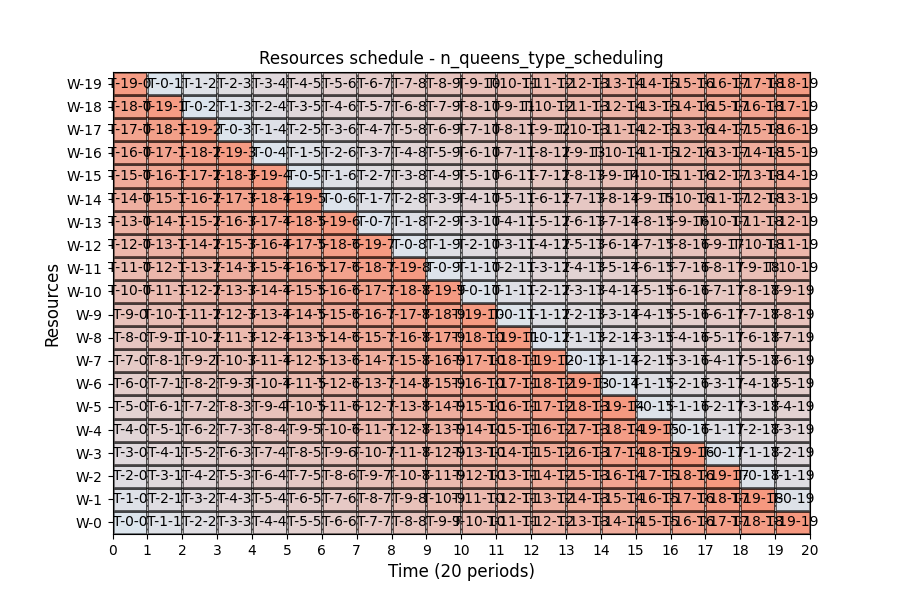

In [8]:
ps.render_gantt_matplotlib(sol)